# Imports

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Functions

In [7]:
def pred_plot(predictors, predictor_label, response, response_label, predictions):
    
    with plt.style.context(('fivethirtyeight')):

        fig, ax = plt.subplots(figsize=(10, 7))

        ax.scatter(predictors, response, c='b', label='actual')
        ax.scatter(predictors, predictions, c='r', label='predicted')
#         z = np.polyfit(predictors, predictions, 1)
#         p = np.poly1d(z)
#         ax.plot(predictors, p(predictors), "r-", linewidth=1)
        ax.set_title('Feature vs Response')
        ax.set_xlabel(predictor_label)
        ax.set_ylabel(response_label)
        ax.legend(loc='upper left')

In [8]:
def res_plot(response, predictions):
    
    residuals = response - predictions
    
    with plt.style.context(('fivethirtyeight')):

        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
        
        ax1.scatter(predictions, response)
#         z = np.polyfit(predictions, response, 1)
#         p = np.poly1d(z)
#         ax1.plot(predictions, p(predictions), "r-", linewidth=1)
        ax1.set_title('Predicted vs Actual Values')
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')

        ax2.scatter(predictions, residuals)
#         z = np.polyfit(predictions, residuals, 1)
#         p = np.poly1d(z)
#         ax2.plot(predictions, p(predictions), "r-", linewidth=1)
        ax2.set_title('Predicted Values vs Residuals')
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Residuals')

# Data

In [9]:
X_num = pd.read_csv('data/data_numeric.csv', index_col=0)
X_cat = pd.read_csv('data/data_categorical.csv', index_col=0)
Y = pd.read_csv('data/data_targets.csv', index_col=0)

In [10]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,4.0,4.0,13090.0,39270.0,2.0,1.0,8.2,9.1,14.2,0.00
10-1054A017,6.0,6.0,14112.0,141120.0,5.0,1.0,12.2,12.8,33.3,0.00
10-1172A275,11.0,11.0,1572.0,11004.0,2.0,3.0,6.1,19.8,12.4,4.77
10-1177 274,98.0,33.0,6580.0,46060.0,2.0,1.0,6.1,7.9,8.1,0.00
10-1211A011,50.0,40.0,37376.0,112128.0,4.0,1.0,15.8,17.1,27.3,0.00


In [7]:
X_cat.head()

,MAINTENANCE_021_1.0,MAINTENANCE_021_2.0,MAINTENANCE_021_3.0,MAINTENANCE_021_4.0,MAINTENANCE_021_11.0,MAINTENANCE_021_12.0,MAINTENANCE_021_21.0,MAINTENANCE_021_25.0,MAINTENANCE_021_26.0,MAINTENANCE_021_27.0,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
10-1038 209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1054A017,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10-1172A275,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1177 274,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1211A011,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
Y.head()

,TO_DWNGRD
ID,
10-1038 209,10
10-1054A017,17
10-1172A275,5
10-1177 274,15
10-1211A011,19


# Preprocessing

In [ ]:
sns.pairplot(pd.concat([X_num, Y], axis=1));

## Impute average values for zeros

In [12]:
for column in X_num.columns:
    X_num[column][X_num[column] == 0] = X_num[column].mean()

In [13]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,4.0,4.0,13090.0,39270.0,2.0,1.0,8.2,9.1,14.2,2.253492
10-1054A017,6.0,6.0,14112.0,141120.0,5.0,1.0,12.2,12.8,33.3,2.253492
10-1172A275,11.0,11.0,1572.0,11004.0,2.0,3.0,6.1,19.8,12.4,4.770000
10-1177 274,98.0,33.0,6580.0,46060.0,2.0,1.0,6.1,7.9,8.1,2.253492
10-1211A011,50.0,40.0,37376.0,112128.0,4.0,1.0,15.8,17.1,27.3,2.253492


## Log Transformation

In [14]:
X_num = np.log(X_num)

/home/kevcon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [15]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,1.386294,1.386294,9.479604,10.578216,0.693147,0.000000,2.104134,2.208274,2.653242,0.812481
10-1054A017,1.791759,1.791759,9.554781,11.857366,1.609438,0.000000,2.501436,2.549445,3.505557,0.812481
10-1172A275,2.397895,2.397895,7.360104,9.306014,0.693147,1.098612,1.808289,2.985682,2.517696,1.562346
10-1177 274,4.584967,3.496508,8.791790,10.737700,0.693147,0.000000,1.808289,2.066863,2.091864,0.812481
10-1211A011,3.912023,3.688879,10.528784,11.627396,1.386294,0.000000,2.760010,2.839078,3.306887,0.812481


## Define feature and target variables

In [16]:
X = X_num.join(X_cat)

In [17]:
y = Y

## EDA

## Test/train split

In [18]:
from sklearn import model_selection

In [19]:
# shuffle and split data into test/train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

## Scale numerical data

In [20]:
from sklearn import preprocessing

In [21]:
# intialize scaler and fit on training features
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
# scale training dataset
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_train_scaled.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
42-117202048830130,0.803778,0.803778,0.426879,0.364510,0.000000,0.000000,0.373784,0.052582,0.228034,0.176432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-020028018030700,0.659307,0.207156,0.833146,0.822144,0.165443,0.334451,0.520584,0.394551,0.414117,0.487497,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-200000BC3101010,0.690807,0.452151,0.868447,0.875436,0.384146,0.562749,0.512230,0.550520,0.507443,0.176432,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-670076340108740,0.614352,0.614352,0.904725,0.930952,0.165443,0.000000,0.518699,0.191675,0.456165,0.319750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-27432000010010,0.803778,0.591234,0.645063,0.661541,0.165443,0.000000,0.373784,0.052582,0.351186,0.176432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_test[X_test.isnull().any(axis=1)]

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
42-170036029008500,0.0,NaN,7.472501,9.669725,0.693147,0.0,3.33577,3.370738,2.433613,0.812481,...,0,1,0,0,0,0,0,0,0,0


In [24]:
X_test.dropna(inplace=True)

/home/kevcon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
# scale test dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_test_scaled.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
42-553019006000800,0.704781,0.261402,0.541147,0.643643,0.165443,0.144040,0.434047,0.207471,0.357673,0.176432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-412029000412140,0.522804,0.522804,0.731748,0.720209,0.262220,0.144040,0.512230,0.294492,0.532417,0.176432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-27125000022910,0.414312,0.414312,0.608262,0.630118,0.165443,0.000000,0.331495,0.013461,0.385286,0.176432,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000230023010,0.647518,0.647518,0.679501,0.723283,0.165443,0.228298,0.260031,0.088460,0.452361,0.176432,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-19194,0.614352,0.614352,0.536531,0.553515,0.165443,0.000000,0.443985,0.133806,0.454906,0.422558,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_train.head()

,TO_DWNGRD
ID,
42-117202048830130,7
42-020028018030700,3
24-200000BC3101010,17
42-670076340108740,13
42-27432000010010,3


In [27]:
y_test = y_test[y_test.index != '42-170036029008500']

In [28]:
y_test.head()

,TO_DWNGRD
ID,
42-553019006000800,13
42-412029000412140,13
42-27125000022910,3
24-100000230023010,5
42-19194,6


# Model

## Initial Linear Regression Modeling

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model.score(X_train_scaled, y_train)

0.06452923662284415

In [32]:
model.score(X_test_scaled, y_test)

-7.125258046897273e+18

In [33]:
predicts = model.predict(X_test_scaled)

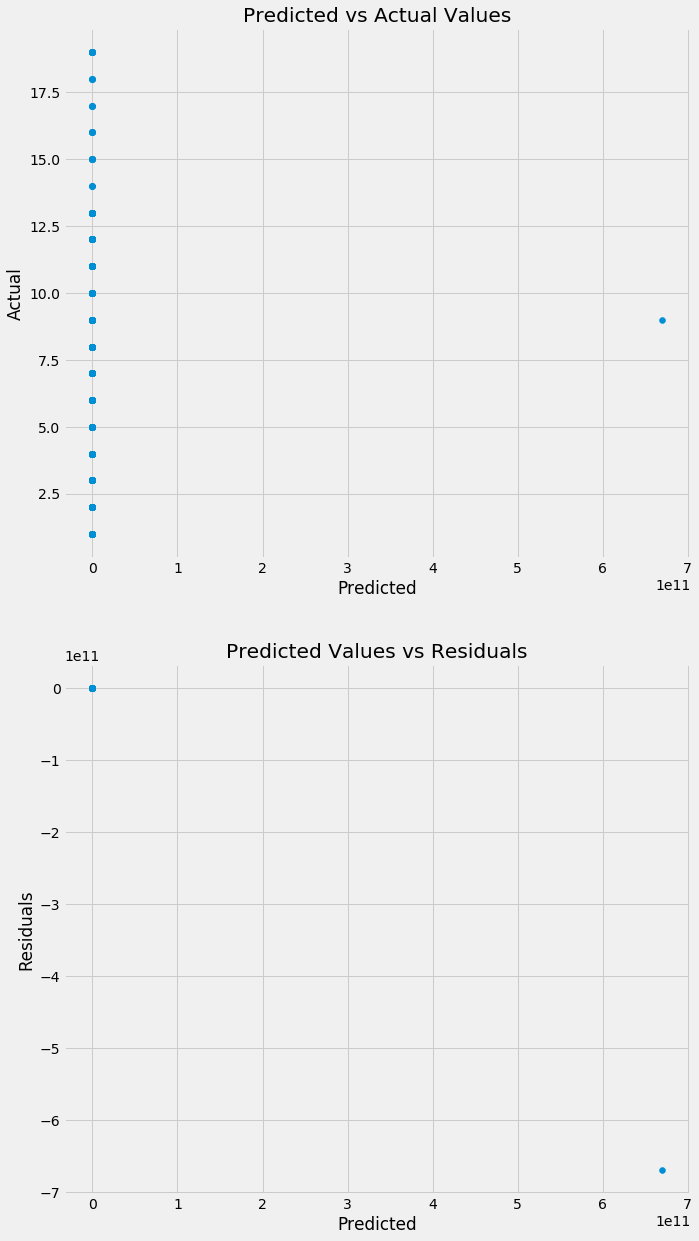

In [34]:
res_plot(y_test.values, predicts)

## Polynomial Transformation

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_mod = PolynomialFeatures(degree=2)
poly_mod.fit(X_train_scaled)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [37]:
X_train_poly = poly_mod.transform(X_train_scaled)

In [38]:
X_train_poly = poly_mod.transform(X_train_scaled)
X_test_poly = poly_mod.transform(X_test_scaled)

In [39]:
model = LinearRegression()

In [ ]:
scores = model_selection.cross_val_score(model, X_train_poly, y_train, cv=10)
scores

In [40]:
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
model.score(X_train_poly, y_train)

0.34227414873598716

In [153]:
model.score(X_test_poly, y_test)

-1.4023654168545905e+22

In [42]:
predicts = model.predict(X_train_poly)

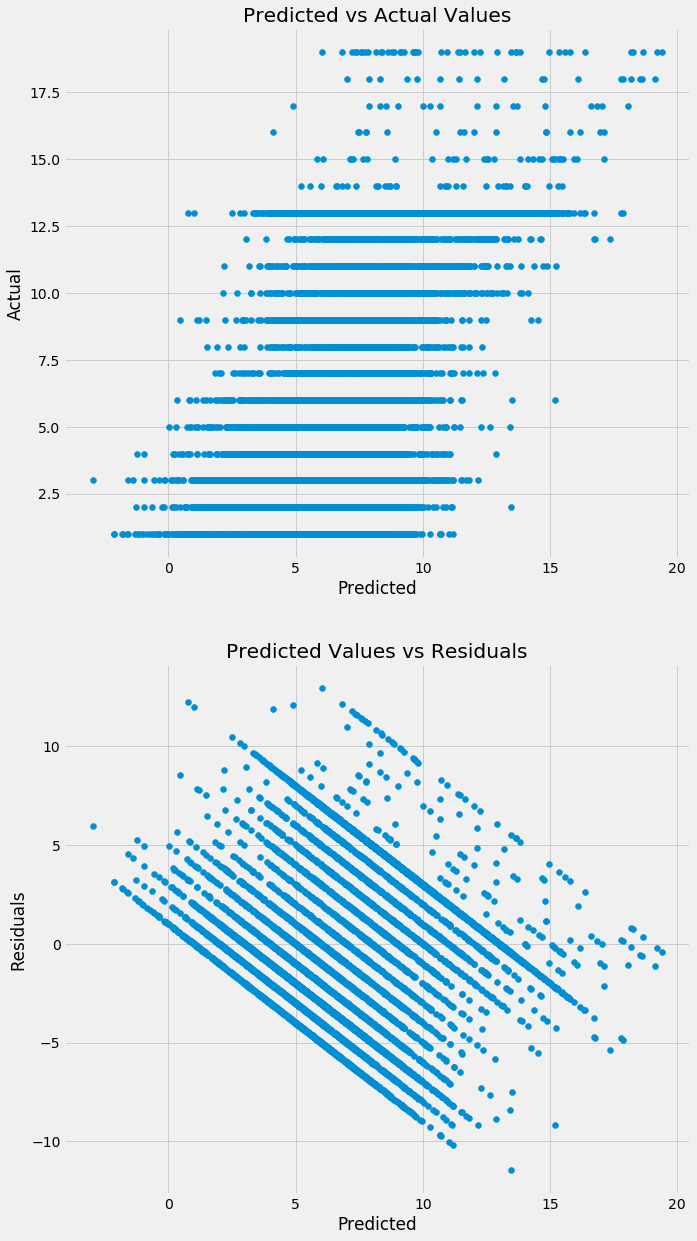

In [43]:
res_plot(y_train.values, predicts)